In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('processed_data_PCA.csv')

X = data.drop('y', axis=1)
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,153 (67.00 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8654 - loss: 0.4022 - val_accuracy: 0.8828 - val_loss: 0.3160
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8878 - loss: 0.3179 - val_accuracy: 0.8900 - val_loss: 0.3078
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8912 - loss: 0.3060 - val_accuracy: 0.8908 - val_loss: 0.3038
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8951 - loss: 0.2919 - val_accuracy: 0.8907 - val_loss: 0.3071
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8947 - loss: 0.2855 - val_accuracy: 0.8908 - val_loss: 0.3012
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8957 - loss: 0.2886 - val_accuracy: 0.8931 - val_loss: 0.2982
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8946 - loss: 0.2801 - val_accuracy: 0.8922 - val_loss: 0.2970
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8915 - loss: 0.2924 - val_accuracy: 0.

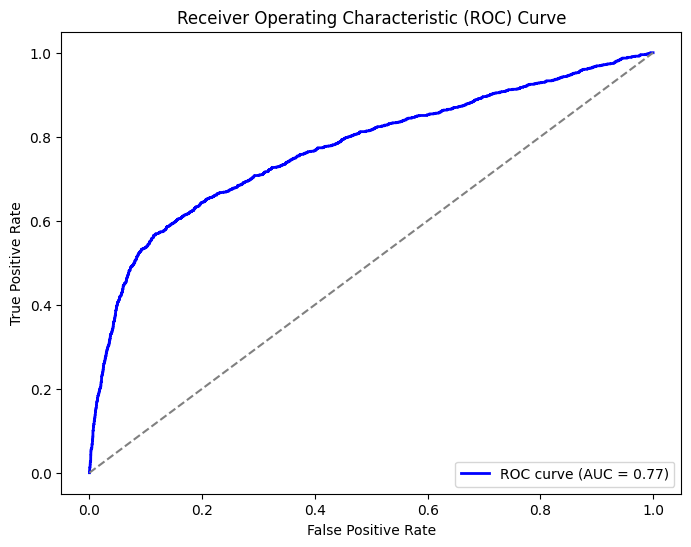

AUC: 0.77


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split

# Build the model
model = Sequential()

# Input layer: Define the number of input features (adjust based on dataset)
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1])) 
model.add(Dropout(0.3))  # Regularization using dropout

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

# Training the model (adjust the epochs and batch size based on dataset)
history = model.fit(X_train, y_train, epochs=50, batch_size=32,  validation_split=0.2)

# Evaluate the model on test data (X_test and y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32") 

# Print classification report
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

tunning

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K

# Clear any previous TensorFlow session
K.clear_session()

# Define the HyperModel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # First hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=32), 
                        activation='relu', input_dim=X_train.shape[1]))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

        # Second hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32), 
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Hyperparameter for learning rate
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        return model

# Initialize the Keras Tuner RandomSearch
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,             # Number of different models to try
    executions_per_trial=3,    # Number of times to train each model
    directory='tuner_results', # Directory to store the results
    project_name='banking_model_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, 
             epochs=50, 
             batch_size=32,
             validation_split=0.2)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

# Manually rebuild the best model
best_model = Sequential()
best_model.add(Dense(units=best_hyperparameters.get('units_1'), 
                     activation='relu', 
                     input_dim=X_train.shape[1]))
best_model.add(Dropout(rate=best_hyperparameters.get('dropout_1')))
best_model.add(Dense(units=best_hyperparameters.get('units_2'), 
                     activation='relu'))
best_model.add(Dropout(rate=best_hyperparameters.get('dropout_2')))
best_model.add(Dense(1, activation='sigmoid'))

best_model.compile(optimizer=Adam(learning_rate=best_hyperparameters.get('learning_rate')),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the manually rebuilt best model
history = best_model.fit(X_train, y_train, 
                         epochs=50, 
                         batch_size=32, 
                        validation_split=0.2)

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy of the best model: {test_accuracy}")


Trial 10 Complete [00h 02m 12s]
val_accuracy: 0.8915307323137919

Best val_accuracy So Far: 0.8930052518844604
Total elapsed time: 02h 03m 06s
Best hyperparameters: {'units_1': 160, 'dropout_1': 0.30000000000000004, 'units_2': 192, 'dropout_2': 0.4, 'learning_rate': 0.00024717828492385585}
Epoch 1/50


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8750 - loss: 0.3959 - val_accuracy: 0.8806 - val_loss: 0.3291
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8860 - loss: 0.3235 - val_accuracy: 0.8860 - val_loss: 0.3202
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8887 - loss: 0.3191 - val_accuracy: 0.8890 - val_loss: 0.3123
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8893 - loss: 0.3104 - val_accuracy: 0.8883 - val_loss: 0.3298
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8911 - loss: 0.3008 - val_accuracy: 0.8891 - val_loss: 0.3071
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8927 - loss: 0.3001 - val_accuracy: 0.8895 - val_loss: 0.3039
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8949 - loss: 0.2911 - val_accuracy: 0.8889 - val_loss: 0.3007
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8932 - loss: 0.2920 - val_accuracy: 0.8884 - val_

Epoch 1/50


905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 918us/step - accuracy: 0.8960 - loss: 0.2798 - val_accuracy: 0.8931 - val_loss: 0.2957
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.8925 - loss: 0.2822 - val_accuracy: 0.8929 - val_loss: 0.2951
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.8962 - loss: 0.2758 - val_accuracy: 0.8925 - val_loss: 0.2960
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - accuracy: 0.8950 - loss: 0.2790 - val_accuracy: 0.8926 - val_loss: 0.2961
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.8970 - loss: 0.2758 - val_accuracy: 0.8922 - val_loss: 0.2954
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step - accuracy: 0.8982 - loss: 0.2708 - val_accuracy: 0.8923 - val_loss: 0.2955
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.8995 - loss: 0.2709 - val_accuracy: 0.8926 - val_loss: 0.2962
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.8953 - loss: 0.2834 - val_accurac

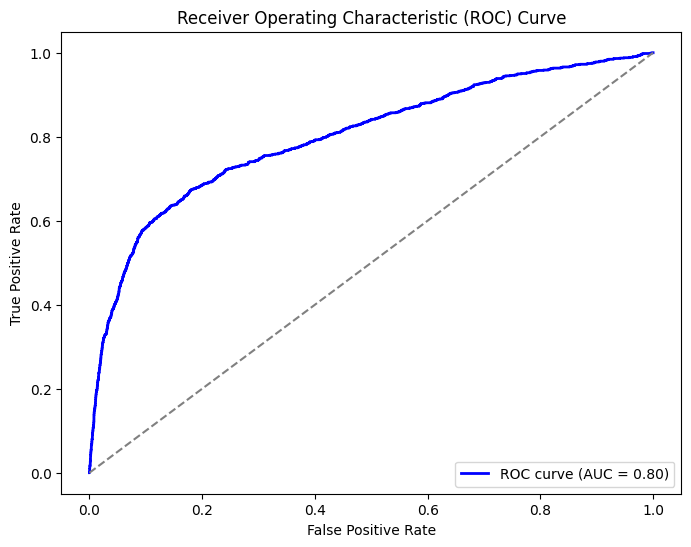

AUC: 0.80
Best hyperparameters: {'units_1': 64, 'dropout_1': 0.4, 'units_2': 128, 'dropout_2': 0.2, 'learning_rate': 0.00013355910839535652}


In [22]:
# Get the history of the best model's training
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Get training accuracy from the history object
print("Training accuracy:", history.history['accuracy'][-1])  # Accuracy of the last epoch

# Evaluate the model on the test data (X_test and y_test)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities for the test set (for ROC curve)
y_prob = best_model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

# You can also print the best hyperparameters found
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")